# Rohan Sutradhar

# Task 1 - Iris Flower Classification

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [33]:
df = pd.read_csv('Iris.csv',index_col = 'Id')
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Understanding the data

In [26]:
print(df.shape)
print()
df.info()

(150, 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [13]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
print(df["Species"].unique())
print(df["Species"].value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [23]:
df[df.duplicated() == True]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
35,4.9,3.1,1.5,0.1,Iris-setosa
38,4.9,3.1,1.5,0.1,Iris-setosa
143,5.8,2.7,5.1,1.9,Iris-virginica


In [24]:
df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [35]:
X = df.copy()

In [37]:
y = df['Species']
X.drop('Species',axis=1, inplace = True)

In [43]:
lb = LabelEncoder()
y = lb.fit_transform(y)

In [44]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y, test_size=0.2, random_state=0)

# Correlation Analysis

<AxesSubplot:>

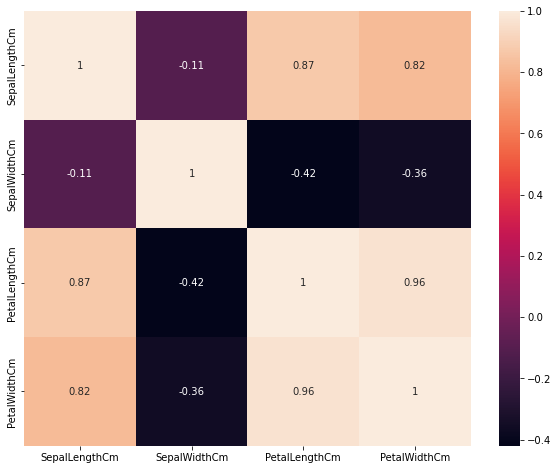

In [7]:
corr = df.corr(method = 'pearson')
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot=True)

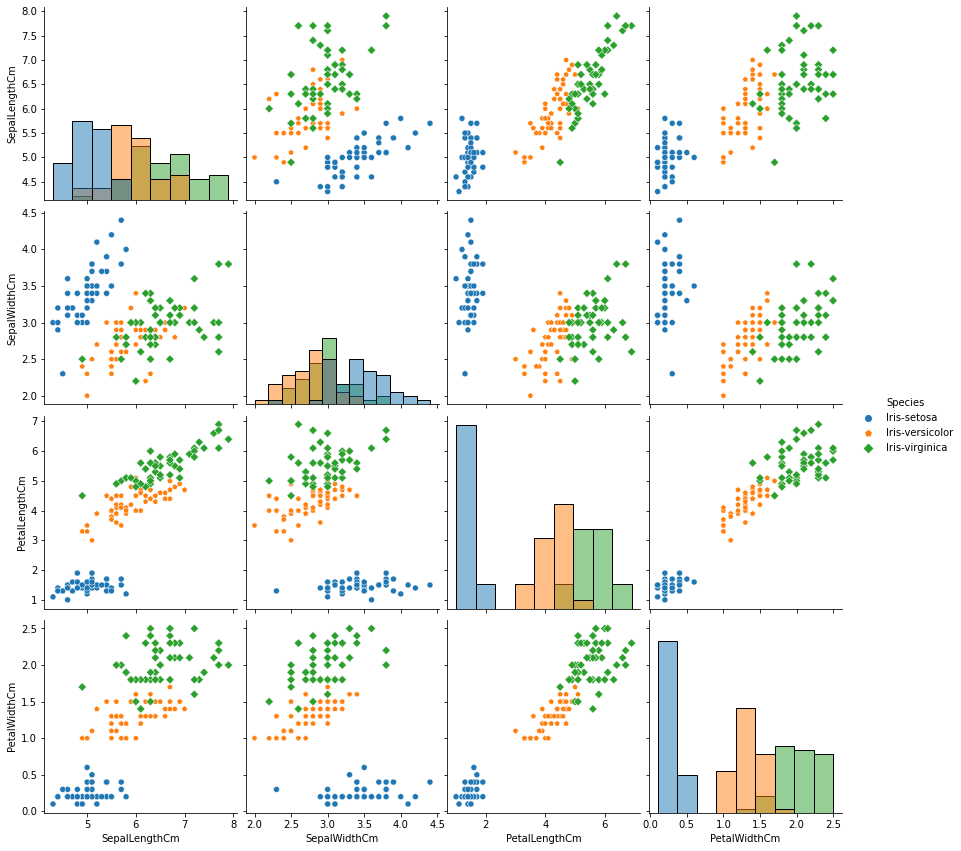

In [11]:
sns.pairplot(df, hue='Species', height = 3, diag_kind = 'hist', markers = ['o','p','D'])

# Model creation

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier

In [61]:
m1 = KNeighborsClassifier(n_neighbors=3)
m2 = DecisionTreeClassifier()
m3 = RandomForestClassifier(n_estimators=50, random_state=0)

In [69]:
def classifier_train(model,X_train,X_valid,y_train,y_valid):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    acc_score = accuracy_score(y_valid,y_pred)*100
    
    return acc_score

# KNN Model

In [70]:
accuracy = classifier_train(m1,X_train,X_valid,y_train,y_valid)
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 96.67%


# Decision Tree

In [64]:
accuracy = classifier_train(m2,X_train,X_valid,y_train,y_valid)
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 100.0%


# RandomForest

In [65]:
accuracy = classifier_train(m3,X_train,X_valid,y_train,y_valid)
print('Accuracy: ' + str(round(accuracy, 2)) + '%')

Accuracy: 96.67%
